In [246]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

csv_file = '/content/drive/My Drive/TFG_AlienEmbarecRiadi/data_numeric_normalized.csv'
data = pd.read_csv(csv_file, delimiter=',')

print(data)

        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent  days_in_waiting_list  customer_type     adr  required_car_parking_spaces  total_of_special_requests  reservation_status  total_stayed_nights  weekend_nights_proportion  reservation_status_year  reservation_status_month  reservation_status_day
0           1            0        342               2015                   7                        27                          1                        0                     0       2         0       0     1               0                     0                  0                       0                               0                   2               

In [247]:


one_hot = pd.get_dummies(data['arrival_date_year'], prefix='year')
data = data.drop('arrival_date_year', axis = 1)
print(one_hot)
data = data.join(one_hot)


        year_2015  year_2016  year_2017
0               1          0          0
1               1          0          0
2               1          0          0
3               1          0          0
4               1          0          0
...           ...        ...        ...
119385          0          0          1
119386          0          0          1
119387          0          0          1
119388          0          0          1
119389          0          0          1

[119390 rows x 3 columns]


In [248]:

one_hot = pd.get_dummies(data['reserved_room_type'], prefix='room')
print(one_hot)
data = data.drop('reserved_room_type', axis = 1)
data = data.join(one_hot)


        room_0  room_1  room_2  room_3  room_4  room_5  room_6  room_7  room_8  room_9
0            0       0       1       0       0       0       0       0       0       0
1            0       0       1       0       0       0       0       0       0       0
2            1       0       0       0       0       0       0       0       0       0
3            1       0       0       0       0       0       0       0       0       0
4            1       0       0       0       0       0       0       0       0       0
...        ...     ...     ...     ...     ...     ...     ...     ...     ...     ...
119385       1       0       0       0       0       0       0       0       0       0
119386       0       0       0       0       1       0       0       0       0       0
119387       0       0       0       1       0       0       0       0       0       0
119388       1       0       0       0       0       0       0       0       0       0
119389       1       0       0       0     

In [249]:

one_hot = pd.get_dummies(data['arrival_date_month'], prefix='month')

data = data.drop('arrival_date_month', 1)

data = data.join(one_hot)




In [250]:


one_hot = pd.get_dummies(data['meal'], prefix='meal')

data = data.drop('meal', 1)

data = data.join(one_hot)



In [251]:

one_hot = pd.get_dummies(data['hotel'], prefix='hotel')

data = data.drop('hotel', 1)

data = data.join(one_hot)

print(data)


        is_canceled  lead_time  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  assigned_room_type  booking_changes  deposit_type  agent  days_in_waiting_list  customer_type     adr  required_car_parking_spaces  total_of_special_requests  reservation_status  total_stayed_nights  weekend_nights_proportion  reservation_status_year  reservation_status_month  reservation_status_day  year_2015  year_2016  year_2017  room_0  room_1  room_2  room_3  room_4  room_5  room_6  room_7  room_8  room_9  month_1  month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  month_12  meal_0  meal_1  meal_2  meal_3  hotel_0  hotel_1
0                 0        342                        27                          1                        0                     0       2         0      

In [252]:
for j in data:
    IQR = data[j].quantile(0.75) - data[j].quantile(0.25)
    Lower_fence = data[j].quantile(0.25) - (IQR * 3)
    Upper_fence = data[j].quantile(0.75) + (IQR * 3)
    print(j + ' outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



is_canceled outliers are values < -3.0 or > 4.0
lead_time outliers are values < -408.0 or > 586.0
arrival_date_week_number outliers are values < -50.0 or > 104.0
arrival_date_day_of_month outliers are values < -37.0 or > 68.0
stays_in_weekend_nights outliers are values < -6.0 or > 8.0
stays_in_week_nights outliers are values < -5.0 or > 9.0
adults outliers are values < 2.0 or > 2.0
children outliers are values < 0.0 or > 0.0
babies outliers are values < 0.0 or > 0.0
market_segment outliers are values < -1.0 or > 6.0
distribution_channel outliers are values < 2.0 or > 2.0
is_repeated_guest outliers are values < 0.0 or > 0.0
previous_cancellations outliers are values < 0.0 or > 0.0
previous_bookings_not_canceled outliers are values < 0.0 or > 0.0
assigned_room_type outliers are values < -9.0 or > 12.0
booking_changes outliers are values < 0.0 or > 0.0
deposit_type outliers are values < 0.0 or > 0.0
agent outliers are values < -428.0 or > 587.0
days_in_waiting_list outliers are values < 0

In [253]:
data['all_children'] = data['children'] + data['babies']
data = data.drop('children', 1)
data = data.drop('babies', 1)

In [299]:

# eliminando adr > 300
indexNames = data[ data['adr'] > 300 ].index


print('indexNames ', indexNames)
data.drop(indexNames , inplace=True)
data.dropna(axis=0, inplace=True)

# eliminando adr <= 0
indexNames = data[ data['adr'] <= 0 ].index

print('indexNames ', indexNames)
data.drop(indexNames , inplace=True)
data.dropna(axis=0, inplace=True)

indexNames = data[ data['adults'] >= 6 ].index


data.drop(indexNames , inplace=True)
data.dropna(axis=0, inplace=True)

from matplotlib import pyplot as plt


one_hot = pd.get_dummies(data['adults'], prefix='adults')

data = data.drop('adults', 1)

data = data.join(one_hot)

# copiar dataset original
dataCopy = data.copy()




variable_objetivo = dataCopy.pop('adr')
dataCopy = dataCopy.drop('agent', 1)

print(dataCopy.shape)
print(dataCopy.columns)


indexNames  Int64Index([], dtype='int64')
indexNames  Int64Index([], dtype='int64')


KeyError: ignored

In [255]:
# standarize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_transformed = scaler.fit_transform(dataCopy)
print(data_transformed.shape)


(117154, 61)


In [256]:

# data = pd.DataFrame(data_transformed, index = data.index, columns = data.columns)


dataCopy = pd.DataFrame(data_transformed, index=range(data_transformed.shape[0]),
                          columns=['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'total_stayed_nights', 'weekend_nights_proportion', 'reservation_status_year', 'reservation_status_month', 'reservation_status_day', 'year_2015', 'year_2016', 'year_2017', 'room_0', 'room_1', 'room_2', 'room_3', 'room_4', 'room_5', 'room_6', 'room_7', 'room_8', 'room_9', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'meal_0', 'meal_1', 'meal_2', 'meal_3', 'hotel_0', 'hotel_1', 'all_children', 'adults_0', 'adults_1', 'adults_2', 'adults_3', 'adults_4'], dtype='object')

print(dataCopy)

dataCopy.to_csv("/content/drive/My Drive/TFG_AlienEmbarecRiadi/data_regression.csv", index=False)



       is_canceled  lead_time arrival_date_week_number arrival_date_day_of_month stays_in_weekend_nights stays_in_week_nights market_segment distribution_channel is_repeated_guest previous_cancellations previous_bookings_not_canceled assigned_room_type booking_changes deposit_type days_in_waiting_list customer_type required_car_parking_spaces total_of_special_requests reservation_status total_stayed_nights weekend_nights_proportion reservation_status_year reservation_status_month reservation_status_day year_2015 year_2016 year_2017    room_0     room_1    room_2    room_3    room_4   room_5    room_6     room_7      room_8 room_9   month_1   month_2   month_3   month_4   month_5   month_6   month_7   month_8   month_9  month_10  month_11 month_12    meal_0    meal_1    meal_2     meal_3   hotel_0   hotel_1 all_children   adults_0  adults_1  adults_2  adults_3   adults_4
0        -0.774473  -0.917802              -0.00891064                  -1.68522               -0.940007            -

In [257]:
X = dataCopy.copy()
y = variable_objetivo.copy()

In [258]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [259]:

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
print(y.shape)
print(X_1.shape)
#Fitting sm.OLS model
model = sm.OLS(list(y),X_1.astype(float)).fit()
model.pvalues

(117154,)
(117154, 62)


const                              0.000000e+00
is_canceled                        5.628556e-19
lead_time                          0.000000e+00
arrival_date_week_number           5.937157e-24
arrival_date_day_of_month          2.487002e-38
stays_in_weekend_nights            9.224153e-01
stays_in_week_nights               9.224153e-01
market_segment                    1.075456e-280
distribution_channel               4.620266e-24
is_repeated_guest                 3.886701e-111
previous_cancellations             1.687324e-22
previous_bookings_not_canceled     4.782713e-50
assigned_room_type                 7.069141e-08
booking_changes                    1.890660e-17
deposit_type                      2.785178e-134
days_in_waiting_list               1.136355e-35
customer_type                      5.441304e-11
required_car_parking_spaces        7.410642e-76
total_of_special_requests         2.335975e-257
reservation_status                 9.217266e-04
total_stayed_nights                9.224

In [260]:
#Backward Elimination
cols = list(X.columns)
pmax = 1 
while (len(cols)>0):
    p= []
    X_1 = X[cols] # 
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(list(y),X_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'weekend_nights_proportion', 'reservation_status_year', 'reservation_status_month', 'year_2016', 'year_2017', 'room_0', 'room_1', 'room_2', 'room_3', 'room_5', 'room_6', 'room_7', 'room_9', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'meal_0', 'meal_1', 'meal_2', 'hotel_1', 'all_children', 'adults_0', 'adults_1', 'adults_2', 'adults_3']


In [261]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True False False False False False
 False]
[44 34 35 37 19 17 40 48 43 51 47 50 53 41 49 52 45 42 46 18 54 38 39 55
  3  2  1 25 29 31 26 32 28 27 30 33 16 15 14 13 10  8  7  5  4  6  9 12
 11  1  1  1  1  1  1 36 23 21 22 20 24]


In [262]:
#no of features
nof_list=np.arange(1,50)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 49
Score with 49 features: 0.600271


In [263]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['year_2015', 'year_2016', 'year_2017', 'month_7', 'month_8', 'month_9', 'meal_0', 'meal_1', 'meal_2', 'meal_3', 'hotel_0', 'hotel_1'], dtype='object')


In [264]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29712.34366041422, tolerance: 21052.685010818564
  tol, rng, random, positive)


Best alpha using built-in LassoCV: 0.213512
Best score using built-in LassoCV: 0.599211


In [265]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 49 variables and eliminated the other 12 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

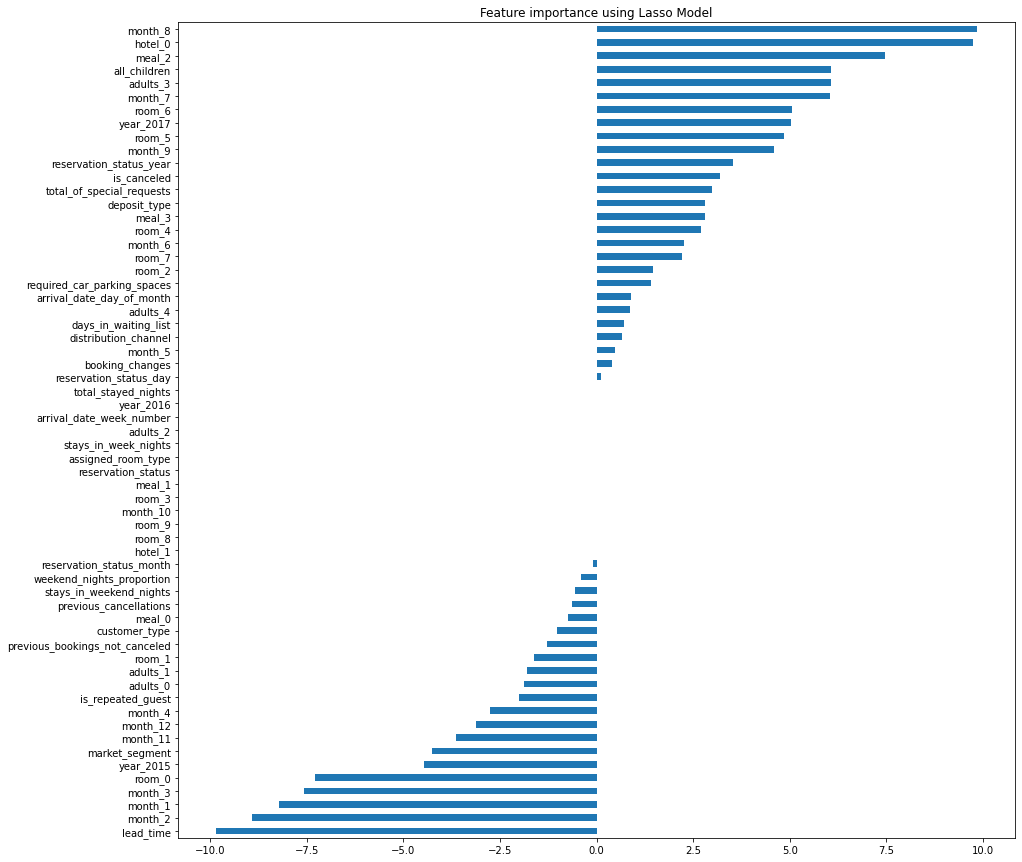

In [266]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [300]:

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X = dataCopy[['distribution_channel', 'total_stayed_nights', 'weekend_nights_proportion', 'customer_type', 'lead_time', 'all_children']]
print(X.shape)
y = variable_objetivo

print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print(variable_objetivo)


(117154, 6)
(117154,)
(87865, 6) (87865,)
(29289, 6) (29289,)
2          75.00
3          75.00
4          98.00
5          98.00
6         107.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 117154, dtype: float64


(87865, 6)
(87865,)
Cross-validated scores: [0.06441708 0.03256706]


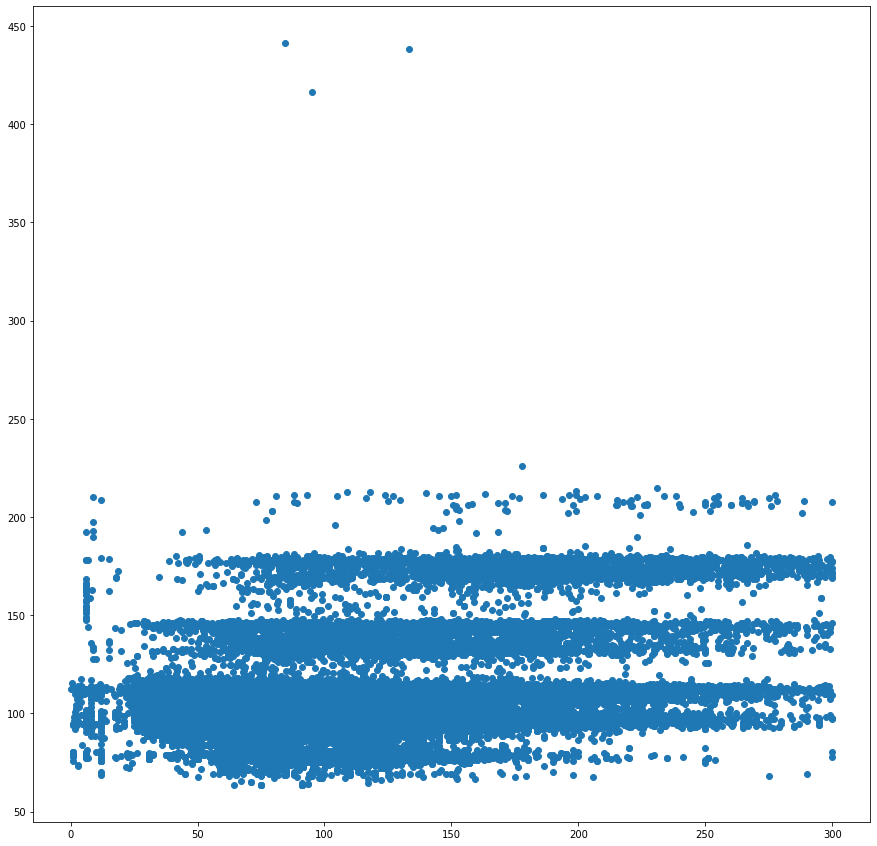

In [301]:
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn import metrics
# fit a model
lm = linear_model.LinearRegression()

print(X_train.shape)
print(y_train.shape)
model = lm.fit(X_train, y_train)

# Perform 6-fold cross validation


scores = cross_val_score(model, X, y, cv=2)
print ('Cross-validated scores:', scores)

# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=2)
plt.scatter(y, predictions)


In [302]:
accuracy = metrics.r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.0698860651693618


In [284]:
#Using Pearson Correlation
'''
plt.figure(figsize=(35,35))
cor = dataCopy.corr()

try:
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
except ValueError:  #raised if `y` is empty.
    pass

plt.show()
'''

'\nplt.figure(figsize=(35,35))\ncor = dataCopy.corr()\n\ntry:\n    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)\nexcept ValueError:  #raised if `y` is empty.\n    pass\n\nplt.show()\n'

In [ ]:
# seleccion de caracteristicas
'''
cor_target = abs(cor["hotel"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.3]
relevant_features
'''

In [303]:
lm = LinearRegression()
# df.drop(['C', 'D'], axis = 1)
X = dataCopy[['distribution_channel', 'total_stayed_nights', 'weekend_nights_proportion','customer_type', 'lead_time', 'all_children', 'deposit_type','arrival_date_week_number', 'market_segment','hotel_0', 'hotel_1']]
y = variable_objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
regression_model = lm.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)


(87865, 11)
(29289, 11)


In [ ]:
print(X.shape)

In [311]:
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn import metrics
# Perform 6-fold cross validation


scores = cross_val_score(regression_model, X, y, cv=4)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.17248904 0.17172748 0.13979547 0.091773  ]


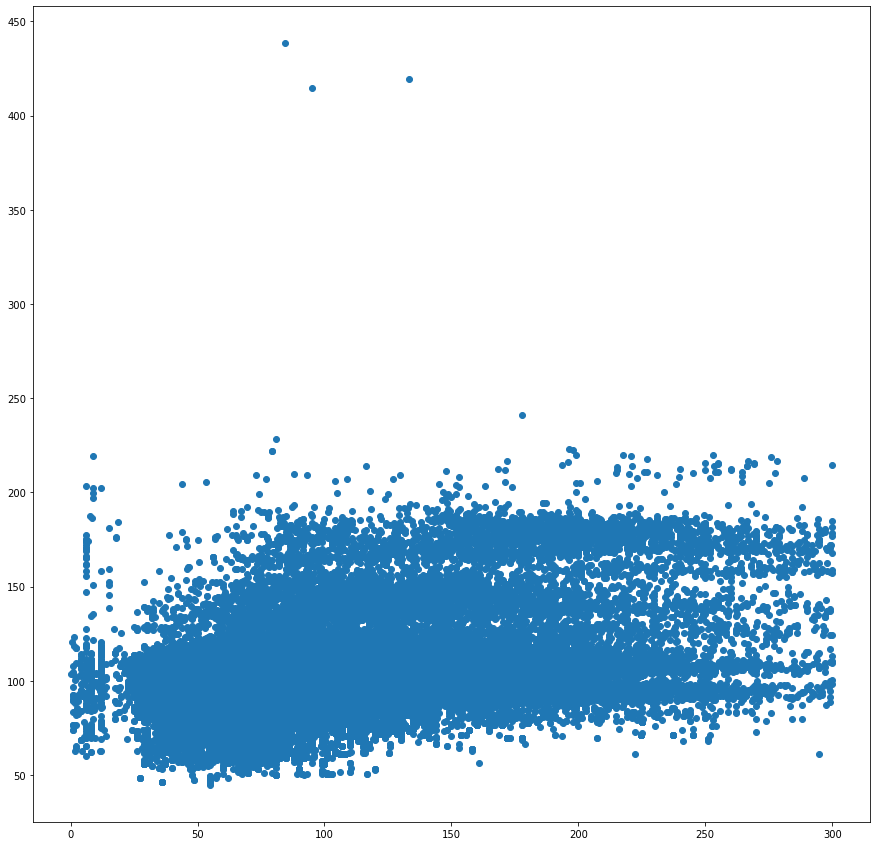

In [312]:
# Make cross validated predictions
predictions = cross_val_predict(regression_model, X, y, cv=5)
plt.scatter(y, predictions)


In [313]:
accuracy = metrics.r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.15587473276305908


In [307]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=9)
knn_model = knn.fit(X_train, y_train)

print(X_train.shape)
print(y_train.shape)


(87865, 11)
(87865,)


In [308]:
scores = cross_val_score(knn_model, X, y, cv=4)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.41016488 0.36585951 0.27410793 0.24572408]


Text(0, 0.5, 'Predictions')

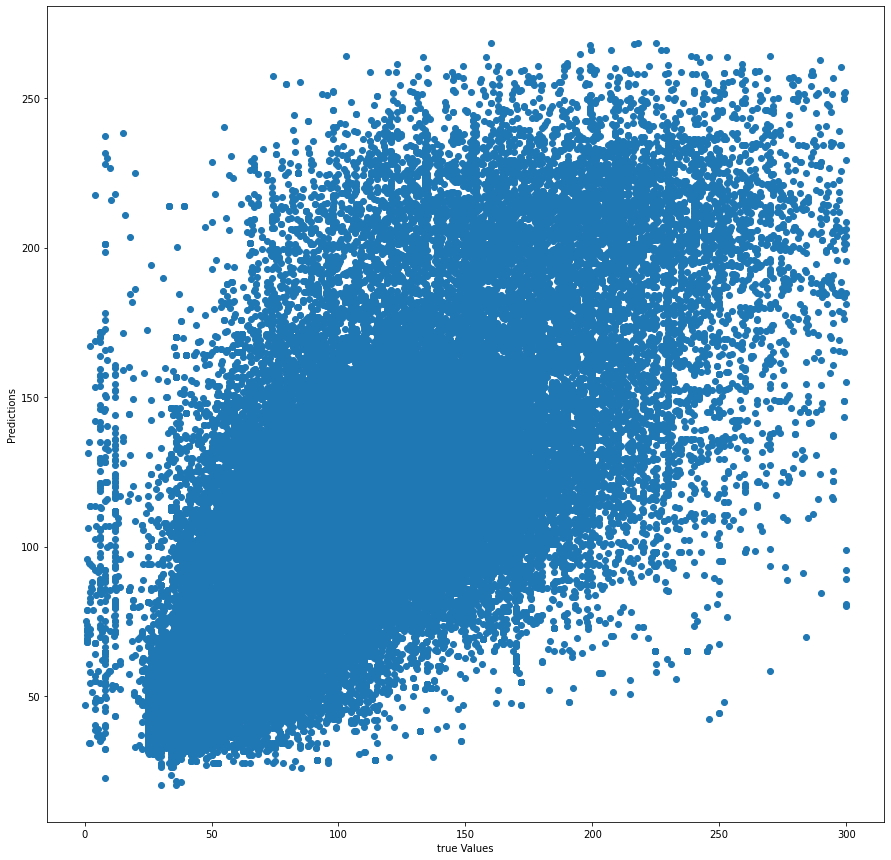

In [309]:
knn_predictions = cross_val_predict(knn_model, X, y, cv=4)
plt.scatter(y, knn_predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

In [310]:
accuracy = metrics.r2_score(y, knn_predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.36762925295637716


Cross-validated scores: [0.1188348  0.09344812 0.1366533  0.21315172 0.08457293]
41.735478309001266
0.15587473276305908


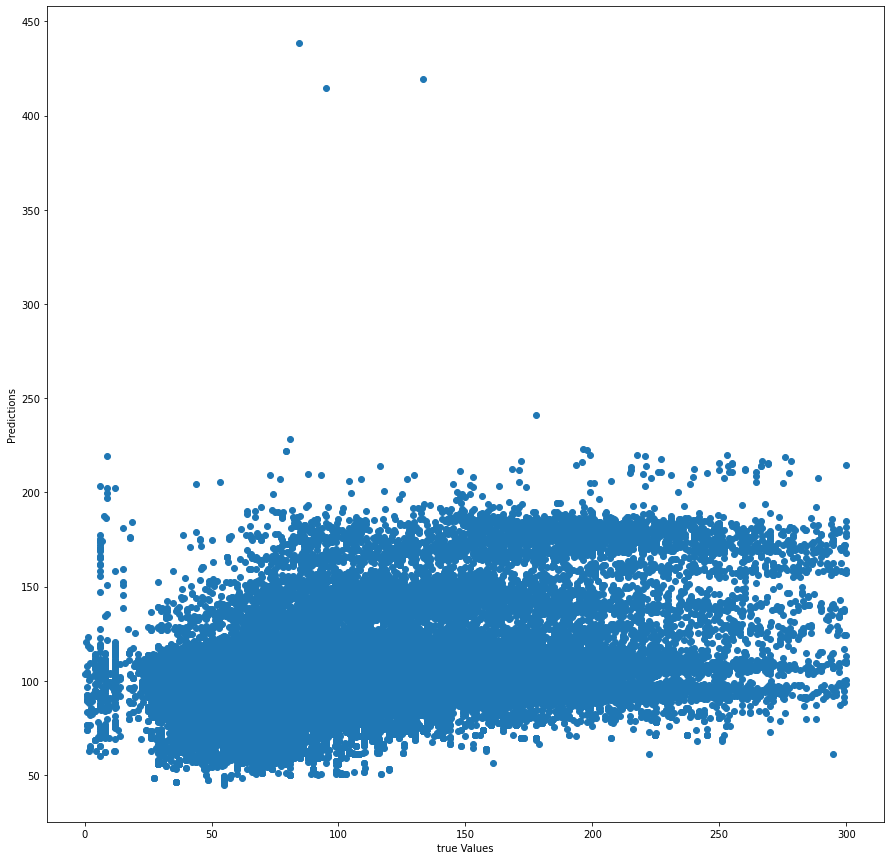

In [315]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)


scores = cross_val_score(model, X, y, cv=5)
print ('Cross-validated scores:', scores)

y_poly_pred = cross_val_predict(model, X, y, cv=5)

plt.scatter(y, y_poly_pred)
plt.xlabel('true Values')
plt.ylabel('Predictions')


rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = metrics.r2_score(y,y_poly_pred)
print(rmse)
print(r2)

Cross-validated scores: [ 0.19630472  0.1120782   0.13195123  0.24564156  0.13301107 -0.09083245
  0.14488395  0.05512639]
41.285783913256644
0.17396741339689026


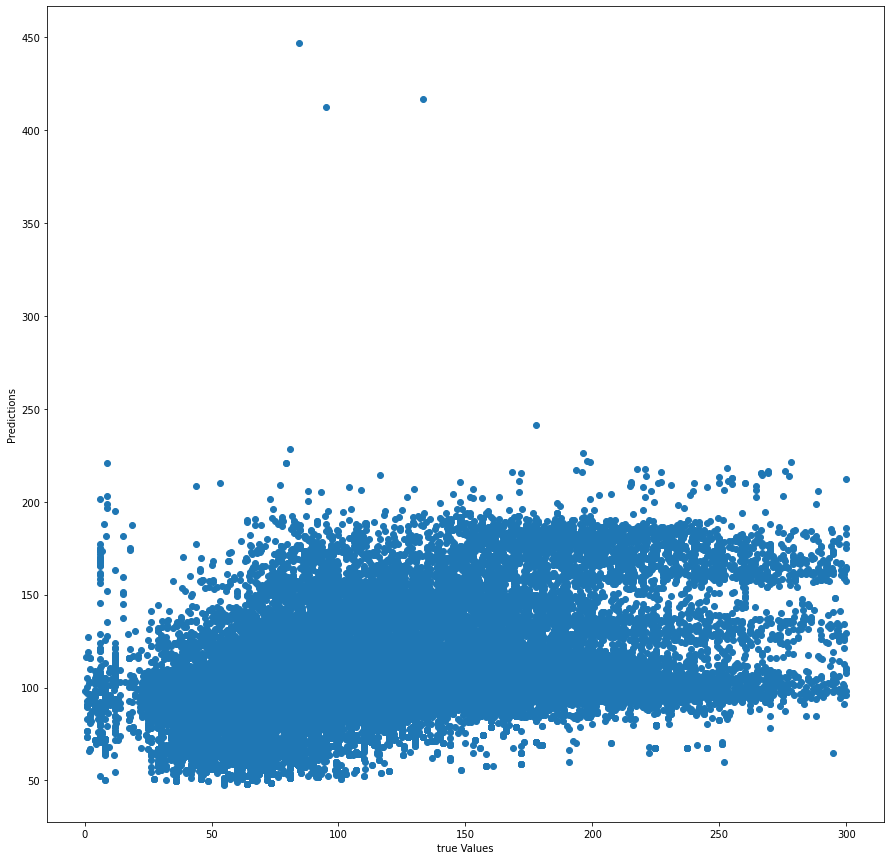

In [316]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X,y)

scores = cross_val_score(ridge, X, y, cv=8)
print ('Cross-validated scores:', scores)


ridge_predictions = cross_val_predict(ridge, X, y, cv=8)
plt.scatter(y, ridge_predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

rmse = np.sqrt(mean_squared_error(y, ridge_predictions))
r2 = metrics.r2_score(y,ridge_predictions)
print(rmse)
print(r2)

Cross-validated scores: [0.1712065  0.12432752 0.19812826 0.18069218 0.21179162 0.09175467]
41.2372529931299
0.17590825385786857


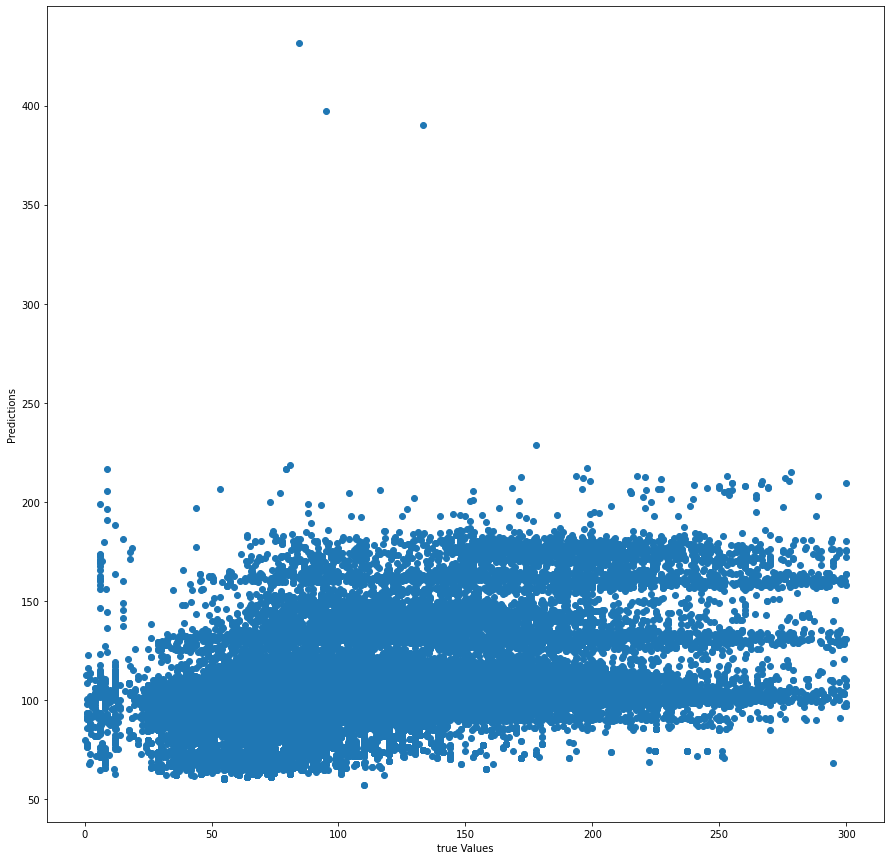

In [317]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X,y)

scores = cross_val_score(lasso, X, y, cv=6)
print ('Cross-validated scores:', scores)


lasso_predictions = cross_val_predict(lasso, X, y, cv=6)
plt.scatter(y, lasso_predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

rmse = np.sqrt(mean_squared_error(y, lasso_predictions))
r2 = metrics.r2_score(y, lasso_predictions)
print(rmse)
print(r2)